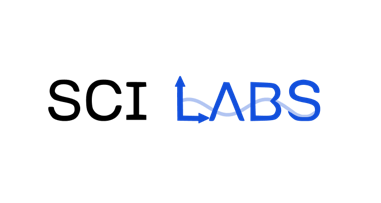

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Trenie - kam mizne energia?

Trenie je fyzikálny jav, ktorý vzniká pri vzájomnom pohybe dvoch dotýkajúcich sa telies. Pri pohybe jedného telesa po povrchu druhého pôsobí trenie proti smeru pohybu, čím spomaľuje jeho rýchlosť. Trenie vzniká v dôsledku nerovností na povrchoch týchto telies, ktoré sa pri kontakte navzájom zadrhávajú. Existujú rôzne druhy trenia, napríklad suché trenie, keď medzi povrchmi nie je žiadna tekutina, a trenie v kvapaline alebo plyne. Trenie má v každodennom živote významný vplyv. Bez trenia by sme boli ako piráti na zamrznutom jazere.

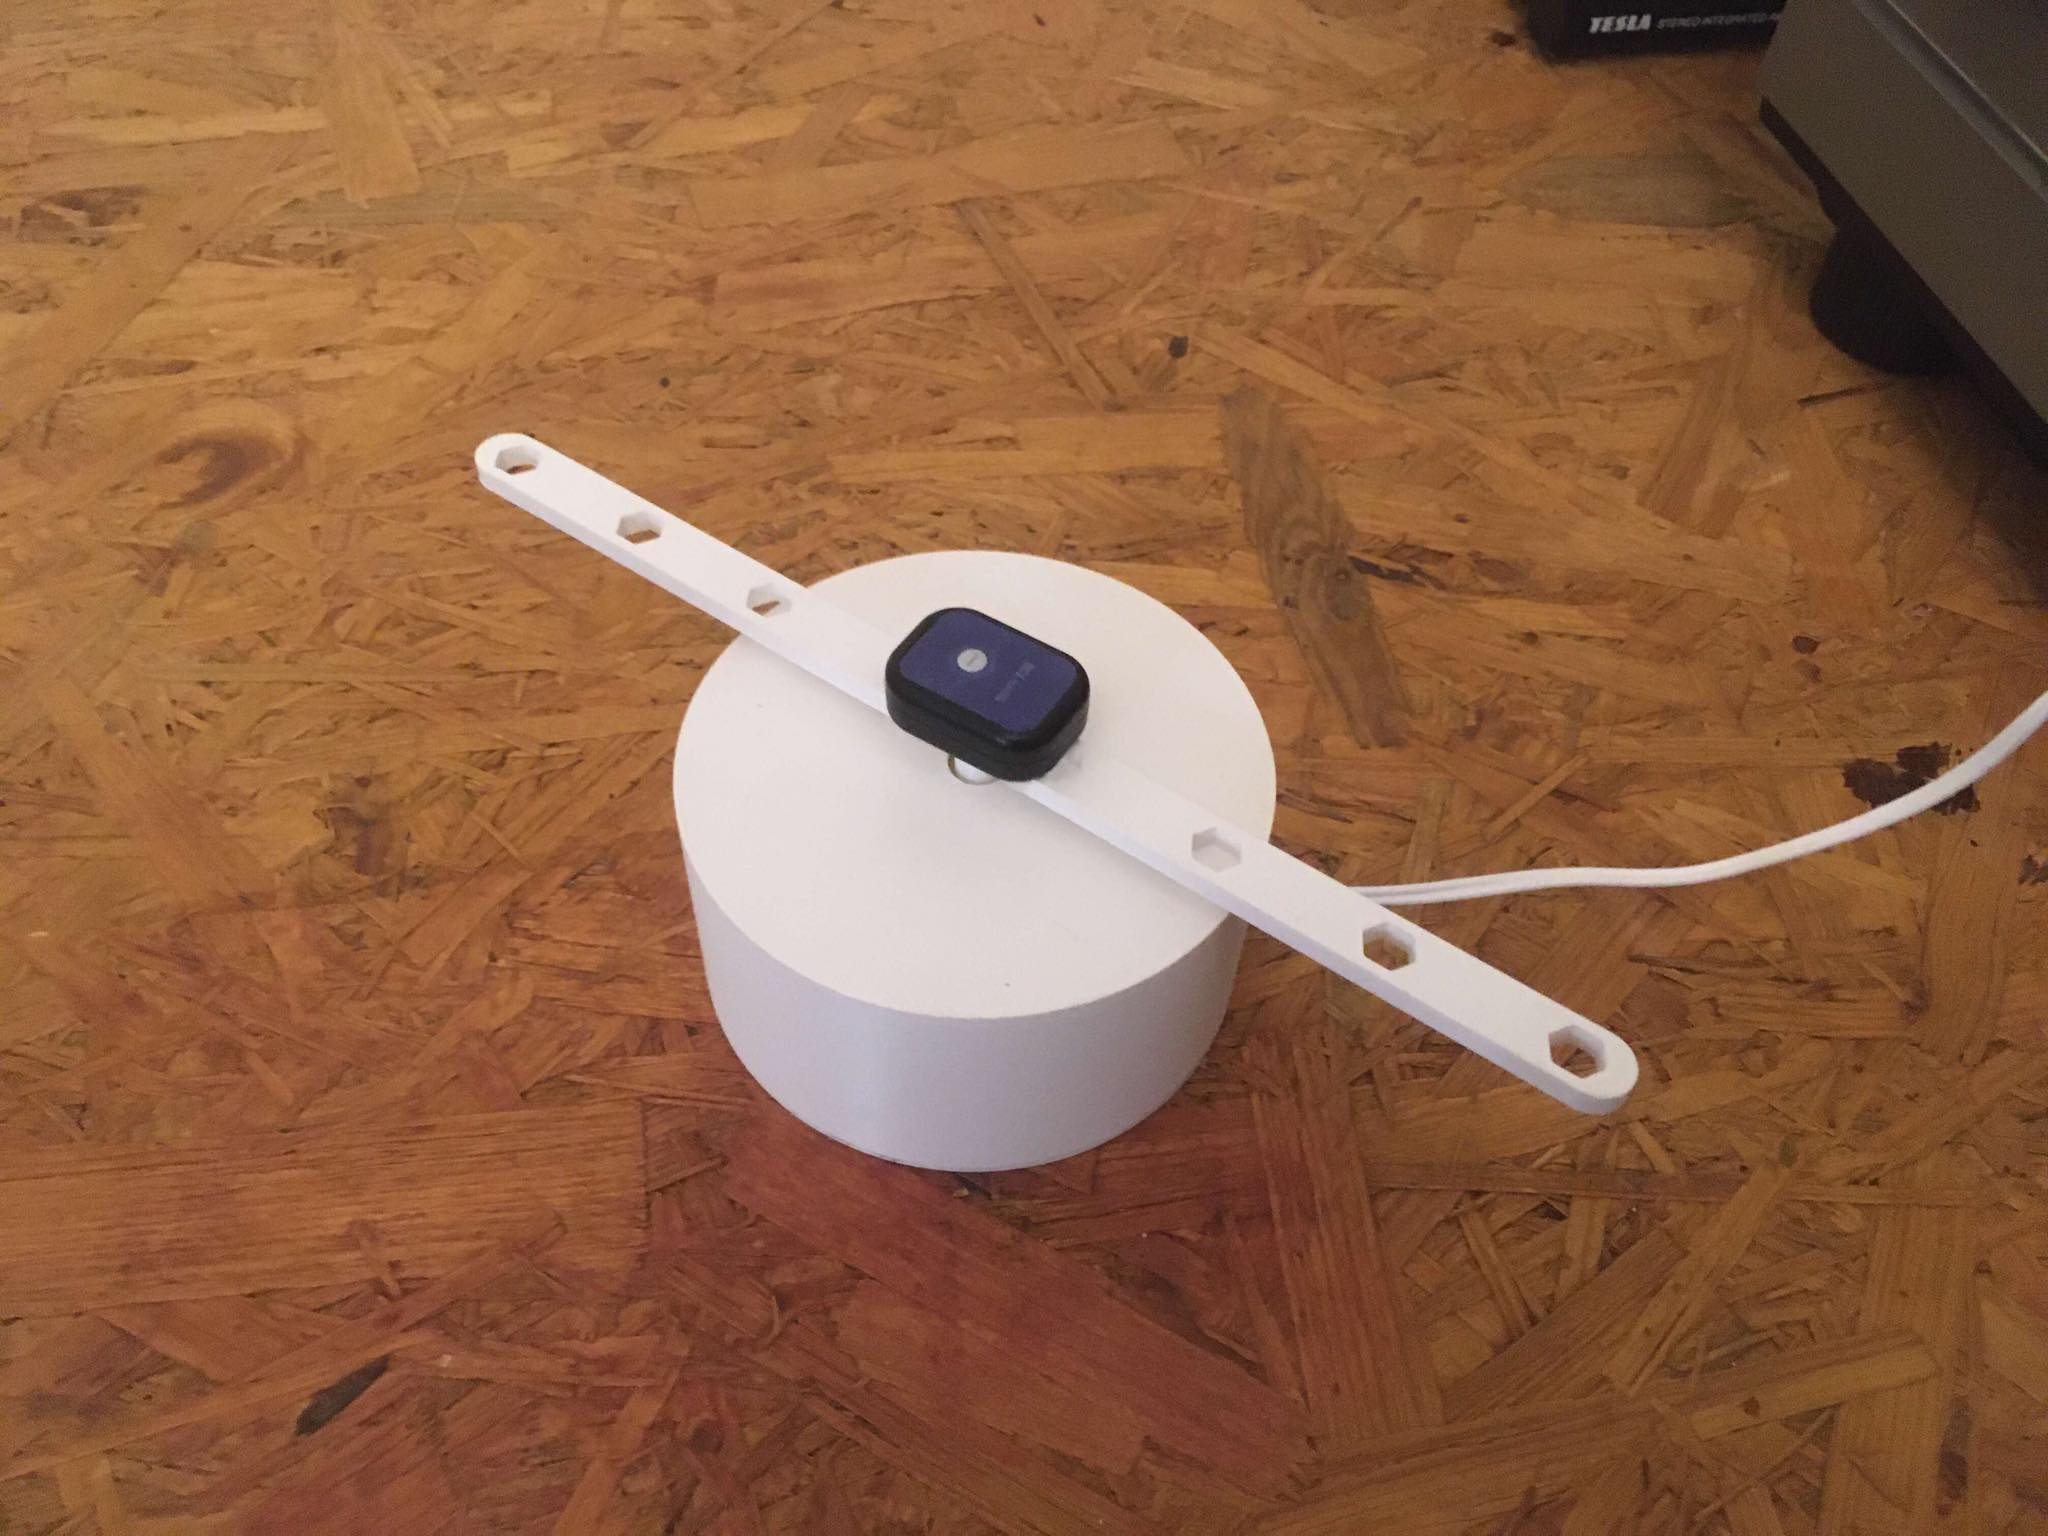

Dnes si nameriame senzor na centrifúge. Na tento senzor prilozime prsty a zatlačíme tak aby sme dostatočne spomalili centrifúgu. Chvíľu takto senzor držíme. Po minúte pustíme senzor, aby sa centrifúga opäť krútila maximálnou rýchosťou. Necháme minútu sa centrifúgu krútiť a uložíme data.

In [ ]:
# Nacitanie dat z merania 1
df2 = pd.read_excel('experiment_trenie.xlsx')

# Vytvorime si stlpec ktory bude iba pocet sekund od zaciatku merania
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df2['sec'] = (df2['timestamp'] - df2['timestamp'].iloc[0]).dt.total_seconds()



Budeme si chcieť vykresliť graf otáčok a teploty v závislosti na čase. Tieto veličiny majú však inú jednotku a preto je treba zvoliť graf s funkciou dvoch os y. Na toto na pomôže funkcia subplots. Taktiež si pre prehladnosť hodnoty uhlovej rýchlosti trochu vyhladíme

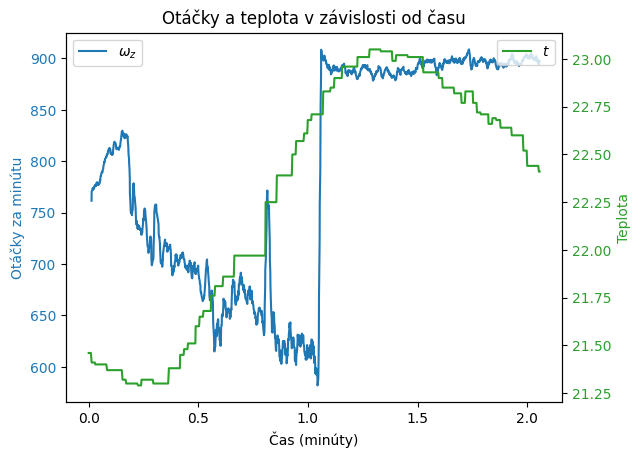

In [ ]:
# Vytvorenie základného grafu
fig, ax1 = plt.subplots()

# Prvý graf pre gyroskop.z
ax1.set_xlabel('Čas (minúty)')
ax1.set_ylabel(r'Otáčky za minútu', color='tab:blue')
ax1.plot(df2['sec'] / 60, -1*df2['gyroscope.z'].rolling(window=10).mean(), label=r'$\omega_{z}$', ) # Rolling average nám postupne nahdradzuje hodnoty za priemer okolitych hodnôt, ich pocet urci funkcia window
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.legend()

# Vytvorenie druhej osi y pre teplotu
ax2 = ax1.twinx()
ax2.set_ylabel(r'Teplota', color='tab:green')
ax2.plot(df2['sec'] / 60, df2['temperature'], label=r'$t$', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.legend()

plt.title('Otáčky a teplota v závislosti od času')
plt.show()


Na grafe je vidno ako sa s počiatku sa senzor ochladzoval keďze sa krútil na voľne vzduchu. Keď sme pritlačili na centrifugu a donútili ju brzdiť trením, vzinklo tak medzi našimi prstami a senzorom teplo. Toto teplo sa postupne cez senzor dostalo dovnútra, až k čidlu teploty. Takto sa senzor postupne ohrieval minútu. Keď sme senzor pustili, centrifúga sa opäť krútila maximálnymi otáčkami, no teplo sa pár sekúnd eštelen dostávalo dovnútra senzora. Po chvíľke však už dominovalo chladiaci efekt točenia sa na vzduchu.